# Linear Regression

In [32]:
import pandas as pd
df = pd.read_csv('data/kc_house_data_clean_knn.csv')
df

,price,bedrooms,bathrooms,surface,floors,waterfront,view,condition,grade,zipcode,lat,long
0,221900.0,3,1.00,1180,1.0,0,0,3,7,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,2.0,0,0,3,7,98125,47.7210,-122.319
2,180000.0,2,1.00,770,1.0,0,0,3,6,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,1.0,0,0,5,7,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,1.0,0,0,3,8,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8,98103,47.6993,-122.346
21609,400000.0,4,2.50,2310,2.0,0,0,3,8,98146,47.5107,-122.362
21610,402101.0,2,0.75,1020,2.0,0,0,3,7,98144,47.5944,-122.299
21611,400000.0,3,2.50,1600,2.0,0,0,3,8,98027,47.5345,-122.069


In [33]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('data/kc_house_data_clean_knn.csv')
y = df['price']
X = df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# On cree un pipeline de proprocessing pour les variables numériques et une autre pour les variables catégorielles
numeric_features = ['bedrooms', 'bathrooms', 'surface', 'floors', 'waterfront' , 'lat' , 'long'] # on récupère les noms des variables numériques
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , PolynomialFeatures

numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), # imputation des valeurs manquantes
        ('normalizer', MinMaxScaler()), # normalisation des données
        ('poly', PolynomialFeatures(degree=2))
        ])

# on déclare à quelles variables on applique quel transformer
# On cree un pre-processeur pour les variables catégorielles
categorial_features = [ "zipcode" , "grade" , "condition" , 'view']

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=True)


from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)


#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression , Lasso
knn_4 = LinearRegression()
pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])


In [34]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8453931021147143

In [35]:
# Faire des prédictions sur le jeu de test
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score


y_pred = trained_pipe.predict(X_test)

# Calculer les métriques d'évaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE : {mae}')
print(f'R2 : {r2}')

MAE : 85065.7036310108
R2 : 0.8453931021147143


In [36]:
predict_lr_X = trained_pipe.predict(X_test)
df_model = X_test.copy()
df_model['price'] = y_test
df_model['predict_price'] = predict_lr_X.round(0)
df_model.head(5)

,bedrooms,bathrooms,surface,floors,waterfront,view,condition,grade,zipcode,lat,long,price,predict_price
735,4,2.25,2070,2.0,0,0,4,8,98058,47.4388,-122.162,365000.0,363520.0
2830,5,3.00,2900,1.0,0,0,5,8,98115,47.6784,-122.285,865000.0,819200.0
4106,4,2.50,3770,2.0,0,2,3,11,98006,47.5646,-122.129,1038000.0,1158144.0
16218,3,3.50,4560,2.0,0,2,3,12,98034,47.6995,-122.228,1490000.0,1815552.0
19964,3,2.50,2550,2.0,0,0,3,9,98052,47.6647,-122.083,711000.0,710656.0


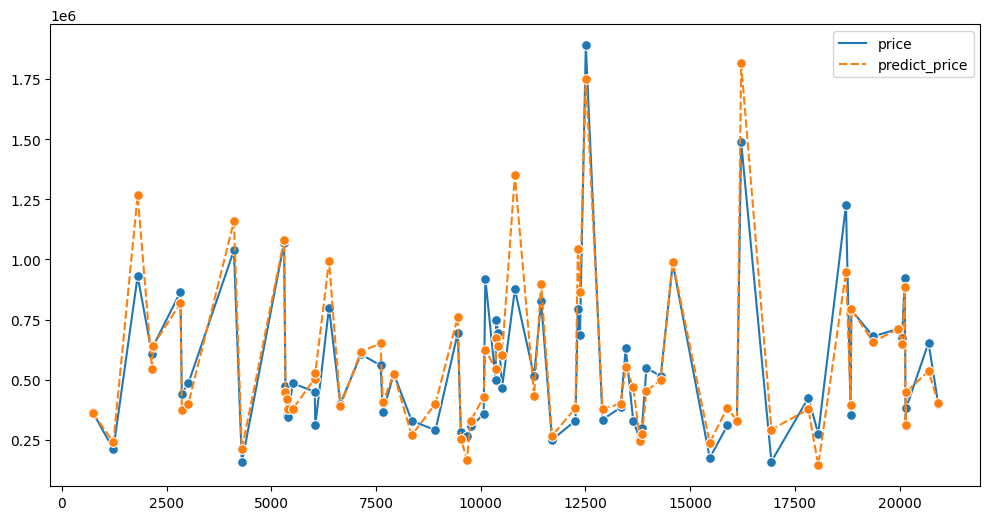

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_model[['price', 'predict_price']].head(70), ax=ax, marker='o', markersize=7)

plt.show()

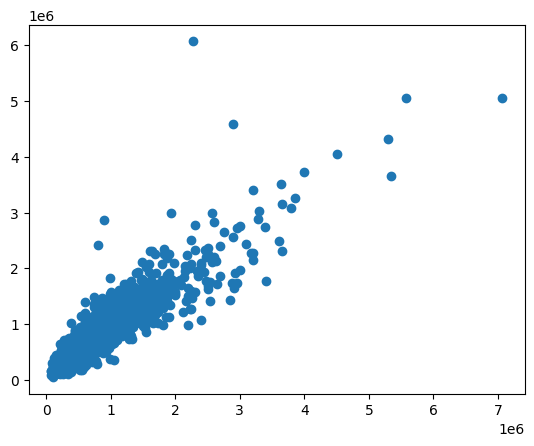

In [38]:
plt.scatter(y_test, predict_lr_X)

# KNN final

In [39]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
df = pd.read_csv('data/kc_house_data_clean_knn.csv') 
# On ajoute une nouvelle variable qui est le rapport entre le nombre de chambre et le nombre de salle de bain
y = df['price']
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)



# On cree un pipeline de proprocessing pour les variables numériques et une autre pour les variables catégorielles
numeric_features = ['bedrooms', 'bathrooms', 'surface', 'floors', 'waterfront' , 'lat' , 'long' ] # on récupère les noms des variables numériques
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), # imputation des valeurs manquantes
        ('scaler', MinMaxScaler()), # normalisation des données
        ])

# on déclare à quelles variables on applique quel transformer
# On cree un pre-processeur pour les variables catégorielles
categorial_features = [ "zipcode" , "grade" , "condition" , 'view']

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=True)


from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)


#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
knn_4 = KNeighborsRegressor(n_neighbors=5 , weights='distance' , p=1)
pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])

In [40]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# Faire des prédictions sur le jeu de test
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score


y_pred = trained_pipe.predict(X_test)

# Calculer les métriques d'évaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE : {mae}')
print(f'R2 : {r2}')

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MAE : 86447.04783677818
R2 : 0.8070170438879439


In [41]:
# faire voir 150 lignes   ## 714283.0
pd.set_option('display.max_rows', 5)
predict_lr_X = trained_pipe.predict(X_test)
df_model = X_test.copy()
df_model['price'] = y_test
df_model['predict_price'] = predict_lr_X.round(0)
df_model.head(5)

,bedrooms,bathrooms,surface,floors,waterfront,view,condition,grade,zipcode,lat,long,price,predict_price
735,4,2.25,2070,2.0,0,0,4,8,98058,47.4388,-122.162,365000.0,406147.0
2830,5,3.00,2900,1.0,0,0,5,8,98115,47.6784,-122.285,865000.0,714283.0
4106,4,2.50,3770,2.0,0,2,3,11,98006,47.5646,-122.129,1038000.0,1097048.0
16218,3,3.50,4560,2.0,0,2,3,12,98034,47.6995,-122.228,1490000.0,1407791.0
19964,3,2.50,2550,2.0,0,0,3,9,98052,47.6647,-122.083,711000.0,687223.0


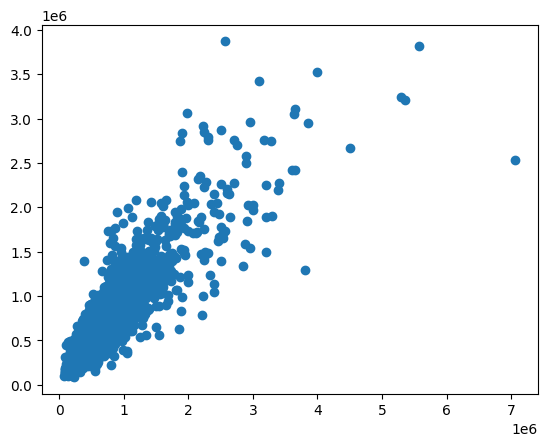

In [42]:
plt.scatter(y_test, predict_lr_X)